In [6]:
import zipfile as zip
with zip.ZipFile("archive.zip", "r") as z:
    z.extractall()


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf
import sklearn
import torch

2025-12-13 09:44:16.042978: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
df = pd.read_csv("kidney_dataset.csv")

In [14]:
df.head()
df.info()
df.describe


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Creatinine        5000 non-null   float64
 1   BUN               5000 non-null   float64
 2   GFR               5000 non-null   float64
 3   Urine_Output      5000 non-null   float64
 4   Diabetes          5000 non-null   int64  
 5   Hypertension      5000 non-null   int64  
 6   Age               5000 non-null   float64
 7   Protein_in_Urine  5000 non-null   float64
 8   Water_Intake      5000 non-null   float64
 9   Medication        2013 non-null   object 
 10  CKD_Status        5000 non-null   int64  
dtypes: float64(7), int64(3), object(1)
memory usage: 429.8+ KB


<bound method NDFrame.describe of       Creatinine        BUN         GFR  Urine_Output  Diabetes  Hypertension  \
0       0.788803   8.386869  102.161787   1632.649387         0             0   
1       3.413970  53.688796   50.071257    935.540516         1             0   
2       0.647645   7.466540   89.451831   1774.553846         1             1   
3       0.795508  12.516821   99.872180   2360.602980         0             0   
4       0.869010  19.855960   86.110182   1987.750901         0             1   
...          ...        ...         ...           ...       ...           ...   
4995    4.048737  53.094020   24.964596   1179.120228         1             1   
4996    0.787392   7.598859   94.228637   2029.623102         0             1   
4997    1.177967  10.198228   89.099101   2463.843638         0             1   
4998    1.189794  12.446732   90.539937   1851.314122         1             0   
4999    1.000078  11.804883   91.697611   2056.462819         0            

In [13]:
df.shape

(5000, 11)

In [15]:
(df.isna().mean() * 100).sort_values(ascending=False)

Medication          59.74
BUN                  0.00
Creatinine           0.00
GFR                  0.00
Urine_Output         0.00
Hypertension         0.00
Diabetes             0.00
Age                  0.00
Protein_in_Urine     0.00
Water_Intake         0.00
CKD_Status           0.00
dtype: float64

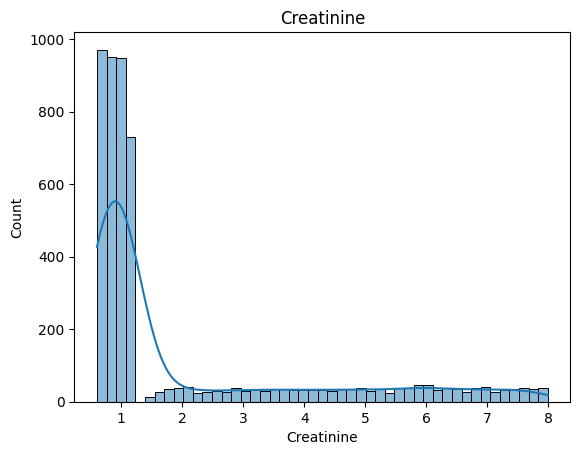

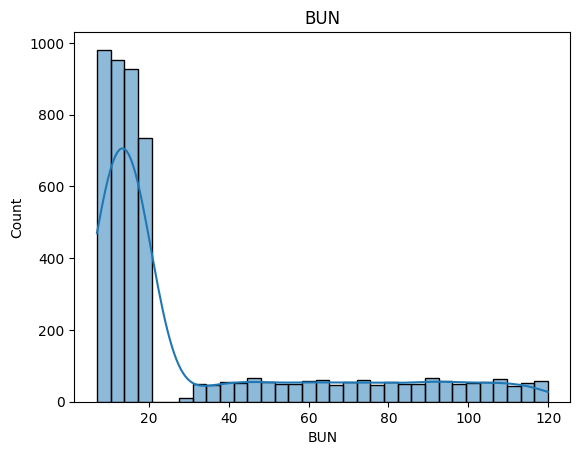

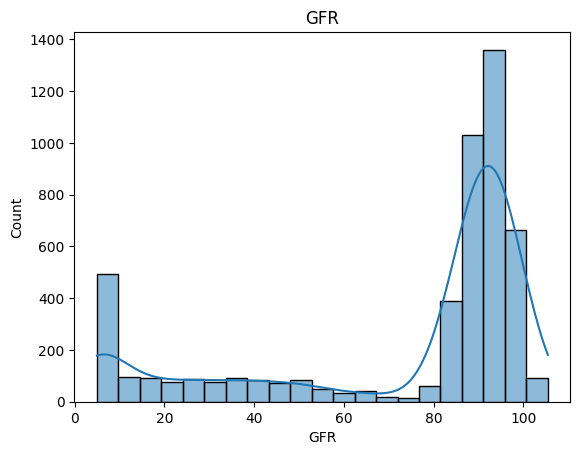

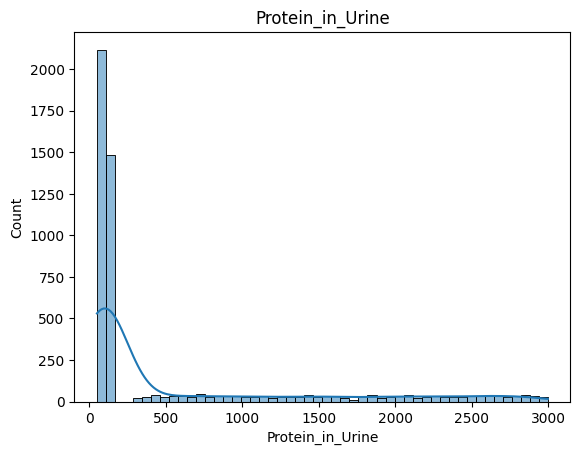

In [17]:
features = ["Creatinine", "BUN", "GFR", "Protein_in_Urine"]


for col in features:
    sns.histplot(df[col], kde=True) 
    plt.title(col)
    plt.show()

/tmp/ipykernel_32897/3123877168.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ckd_counts.index, y=ckd_counts.values, ax=axes[0, 1], palette='pastel')


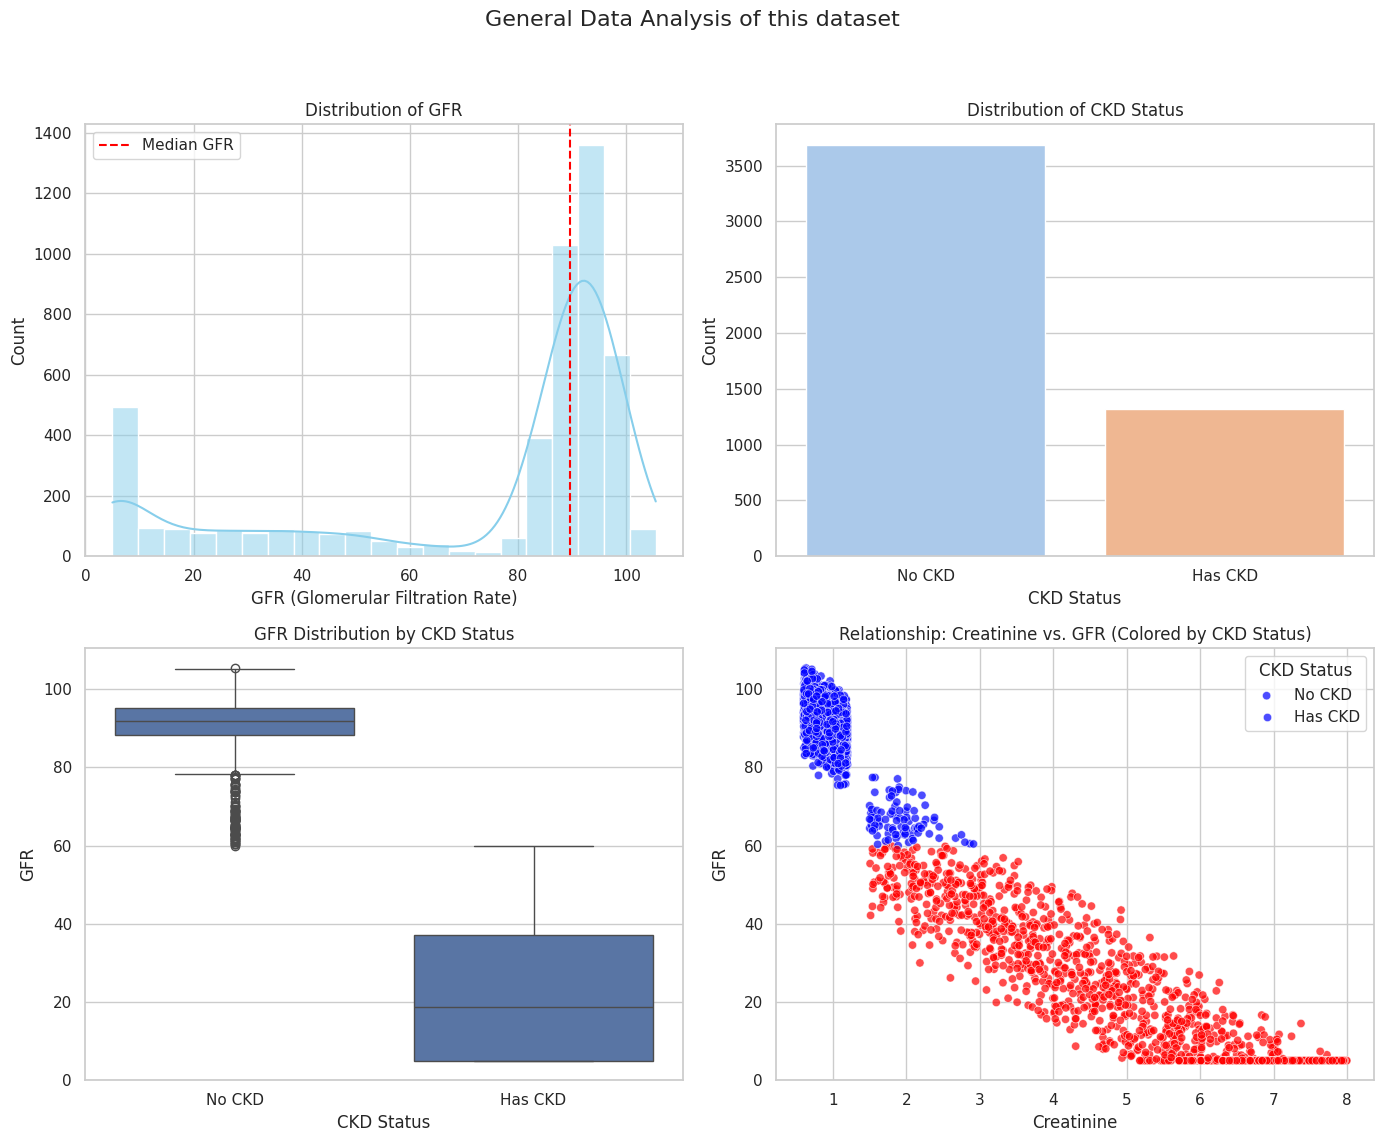


--- Corrected EDA Visualization Output: eda_summary_plots_corrected.png ---


In [20]:
sns.set_theme(style="whitegrid")



fig, axes = plt.subplots(2, 2, figsize =(14,12))
fig.suptitle("General Data Analysis of this dataset", fontsize =16)


sns.histplot(df['GFR'], kde=True, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Distribution of GFR')
axes[0, 0].set_xlabel('GFR (Glomerular Filtration Rate)')
axes[0, 0].axvline(df['GFR'].median(), color='red', linestyle='--', label='Median GFR')
axes[0, 0].legend()



ckd_counts = df['CKD_Status'].map({0: 'No CKD', 1: 'Has CKD'}).value_counts()
sns.barplot(x=ckd_counts.index, y=ckd_counts.values, ax=axes[0, 1], palette='pastel')
axes[0, 1].set_title('Distribution of CKD Status')
axes[0, 1].set_xlabel('CKD Status')
axes[0, 1].set_ylabel('Count')



sns.boxplot(x='CKD_Status', y='GFR', data=df.replace({'CKD_Status': {0: 'No CKD', 1: 'Has CKD'}}), ax=axes[1, 0])
axes[1, 0].set_title('GFR Distribution by CKD Status')
axes[1, 0].set_xlabel('CKD Status')
axes[1, 0].set_ylabel('GFR')


sns.scatterplot(x='Creatinine', y='GFR', hue='CKD_Status', data=df, ax=axes[1, 1], palette={0: 'blue', 1: 'red'}, alpha=0.7)
axes[1, 1].set_title('Relationship: Creatinine vs. GFR (Colored by CKD Status)')
axes[1, 1].set_xlabel('Creatinine')
axes[1, 1].set_ylabel('GFR')
axes[1, 1].legend(title='CKD Status', labels=['No CKD', 'Has CKD'])

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) 
plt.show('eda_summary_plots_corrected.png')


print("\n--- Corrected EDA Visualization Output: eda_summary_plots_corrected.png ---")

In [ ]:
def split_train_test(data,test_ratio):
    